# TRAINER

# Getting The Data

### Setup IG Session

In [1]:
pip install trading_ig pandas munch tenacity

Note: you may need to restart the kernel to use updated packages.


In [2]:
import sys

sys.path.append("./utils/")

In [3]:
from utils.IG import IG

_IG = IG()
config = _IG.getLoginConfig('live')

IG - Instantiated


In [4]:
ig_service = _IG.getIgService(config)
_IG.getIgAccountDetails(ig_service)

{'accountType': 'CFD',
 'accountInfo': {'balance': 237.01,
  'deposit': 52.73,
  'profitLoss': -55.1,
  'available': 129.18},
 'currencyIsoCode': 'USD',
 'currencySymbol': '$',
 'currentAccountId': 'QM0EM',
 'lightstreamerEndpoint': 'https://apd.marketdatasystems.com',
 'accounts': [{'accountId': 'QM0EM',
   'accountName': 'CFD Live',
   'preferred': True,
   'accountType': 'CFD'}],
 'clientId': '104831189',
 'timezoneOffset': 8,
 'hasActiveDemoAccounts': True,
 'hasActiveLiveAccounts': True,
 'trailingStopsEnabled': False,
 'reroutingEnvironment': None,
 'dealingEnabled': True}

### Get the Historical Data of GBP/USD Mini

In [5]:
TARGET_EPIC = 'CS.D.GBPUSD.MINI.IP'
RESOLUTION = '15Min'
PREVIOUS_MONTHS_COUNT_FROM_TODAY = 4

In [6]:
# Get today's next day date as End Date, and previous X month(s) from today as Start Date

from datetime import datetime, date
from dateutil.relativedelta import relativedelta

end_date = datetime.combine(date.today(), datetime.max.time())
start_date = datetime.combine(date.today() - relativedelta(months=PREVIOUS_MONTHS_COUNT_FROM_TODAY), datetime.min.time())

print(f'''End: {end_date}''')
print(f'''Start: {start_date}''')

End: 2022-05-07 23:59:59.999999
Start: 2022-01-07 00:00:00


In [7]:
LOCAL_READ = False

try:
    history = ig_service.fetch_historical_prices_by_epic_and_date_range(TARGET_EPIC, RESOLUTION, start_date, end_date)
    history['prices']
except Exception as e:
    print(e)
    LOCAL_READ = True

In [8]:
# If API failed, read data from previously saved Excel File

from os import listdir
from os.path import isfile, join
    
def readLatestFile(TARGET_EPIC, RESOLUTION, DATA_PATH):
    onlyfiles = [f for f in listdir(DATA_PATH) if isfile(join(DATA_PATH, f))]
    onlyfiles.sort(reverse=True)
    for fileName in onlyfiles:
        if TARGET_EPIC in fileName and RESOLUTION in fileName:
            return fileName
        
    return ''

In [9]:
import pandas as pd

DATA_PATH = '../data/'

if LOCAL_READ:
    print(f'''{DATA_PATH}{readLatestFile(TARGET_EPIC, RESOLUTION, DATA_PATH)}''')
    df_history = pd.read_excel(f'''{DATA_PATH}{readLatestFile(TARGET_EPIC, RESOLUTION, DATA_PATH)}''',
                               index_col=[0], header=[0,1])
    df_history = df_history.rename(columns={df_history.columns[0][1]:''}, level=1)
else:
    print('Retrieved from API')
    df_history = pd.DataFrame.from_dict(history['prices'])
    df_history = df_history.reset_index()
    
df_history

Retrieved from API


DateTime      bid                                 ask  \
                             Open     High      Low    Close     Open   
0    2022-01-07 00:00:00  1.35381  1.35403  1.35319  1.35355  1.35390   
1    2022-01-07 00:15:00  1.35360  1.35376  1.35311  1.35339  1.35375   
2    2022-01-07 00:30:00  1.35338  1.35392  1.35305  1.35362  1.35347   
3    2022-01-07 00:45:00  1.35364  1.35372  1.35294  1.35301  1.35373   
4    2022-01-07 01:00:00  1.35302  1.35340  1.35277  1.35299  1.35311   
...                  ...      ...      ...      ...      ...      ...   
8331 2022-05-07 03:45:00  1.23456  1.23489  1.23395  1.23419  1.23471   
8332 2022-05-07 04:00:00  1.23420  1.23420  1.23360  1.23377  1.23435   
8333 2022-05-07 04:15:00  1.23376  1.23386  1.23339  1.23341  1.23391   
8334 2022-05-07 04:30:00  1.23340  1.23367  1.23319  1.23328  1.23355   
8335 2022-05-07 04:45:00  1.23320  1.23460  1.23304  1.23330  1.23335   

                                last                        
         High      Low    Close Open High Low Close Volume  
0     1.35414  1.35330  1.35370  NaN  NaN NaN   NaN   1700  
1     1.35387  1.35324  1.35348  NaN  NaN NaN   NaN   1602  
2     1.35401  1.35316  1.35371  NaN  NaN NaN   NaN   1558  
3     1.35386  1.35304  1.35310  NaN  NaN NaN   NaN   1216  
4     1.35349  1.35287  1.35308  NaN  NaN NaN   NaN   1285  
...       ...      ...      ...  ...  ...  ..   ...    ...  
8331  1.23504  1.23410  1.23434  NaN  NaN NaN   NaN   2260  
8332  1.23435  1.23375  1.23392  NaN  NaN NaN   NaN    748  
8333  1.23401  1.23354  1.23356  NaN  NaN NaN   NaN    603  
8334  1.23382  1.23334  1.23343  NaN  NaN NaN   NaN    529  
8335  1.23570  1.23319  1.23440  NaN  NaN NaN   NaN   1736  

[8336 rows x 14 columns]

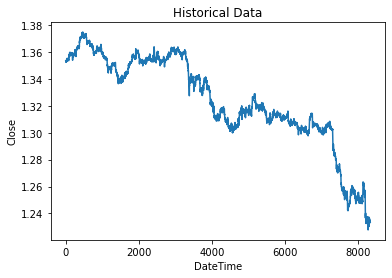

<Figure size 1152x648 with 0 Axes>

In [290]:
import matplotlib.pyplot as plt

plt.plot(df_history[('bid', 'Close')])

plt.xlabel("DateTime")
plt.ylabel("Close")
plt.title("Historical Data")

fig = plt.figure()
fig.set_figheight(9)
fig.set_figwidth(16)

plt.show()

In [291]:
df_history = df_history.sort_values(by=['DateTime'], ascending=False)
df_history

DateTime      bid                                 ask  \
                             Open     High      Low    Close     Open   
8335 2022-05-07 04:45:00  1.23320  1.23460  1.23304  1.23330  1.23335   
8334 2022-05-07 04:30:00  1.23340  1.23367  1.23319  1.23328  1.23355   
8333 2022-05-07 04:15:00  1.23376  1.23386  1.23339  1.23341  1.23391   
8332 2022-05-07 04:00:00  1.23420  1.23420  1.23360  1.23377  1.23435   
8331 2022-05-07 03:45:00  1.23456  1.23489  1.23395  1.23419  1.23471   
...                  ...      ...      ...      ...      ...      ...   
4    2022-01-07 01:00:00  1.35302  1.35340  1.35277  1.35299  1.35311   
3    2022-01-07 00:45:00  1.35364  1.35372  1.35294  1.35301  1.35373   
2    2022-01-07 00:30:00  1.35338  1.35392  1.35305  1.35362  1.35347   
1    2022-01-07 00:15:00  1.35360  1.35376  1.35311  1.35339  1.35375   
0    2022-01-07 00:00:00  1.35381  1.35403  1.35319  1.35355  1.35390   

                                last                        
         High      Low    Close Open High Low Close Volume  
8335  1.23570  1.23319  1.23440  NaN  NaN NaN   NaN   1736  
8334  1.23382  1.23334  1.23343  NaN  NaN NaN   NaN    529  
8333  1.23401  1.23354  1.23356  NaN  NaN NaN   NaN    603  
8332  1.23435  1.23375  1.23392  NaN  NaN NaN   NaN    748  
8331  1.23504  1.23410  1.23434  NaN  NaN NaN   NaN   2260  
...       ...      ...      ...  ...  ...  ..   ...    ...  
4     1.35349  1.35287  1.35308  NaN  NaN NaN   NaN   1285  
3     1.35386  1.35304  1.35310  NaN  NaN NaN   NaN   1216  
2     1.35401  1.35316  1.35371  NaN  NaN NaN   NaN   1558  
1     1.35387  1.35324  1.35348  NaN  NaN NaN   NaN   1602  
0     1.35414  1.35330  1.35370  NaN  NaN NaN   NaN   1700  

[8336 rows x 14 columns]

In [292]:
df_history.describe()

bid                                                 ask  \
              Open         High          Low        Close         Open   
count  8336.000000  8336.000000  8336.000000  8336.000000  8336.000000   
mean      1.324072     1.324533     1.323598     1.324060     1.324275   
std       0.033622     0.033560     0.033687     0.033636     0.033617   
min       1.227760     1.231020     1.227570     1.227770     1.227910   
25%       1.306160     1.306598     1.305680     1.306165     1.306690   
50%       1.320425     1.320920     1.319935     1.320400     1.320680   
75%       1.354423     1.354780     1.354062     1.354430     1.354662   
max       1.374610     1.374840     1.373980     1.374620     1.374700   

                                             last                               
              High          Low        Close Open High  Low Close       Volume  
count  8336.000000  8336.000000  8336.000000  0.0  0.0  0.0   0.0  8336.000000  
mean      1.324733     1.323799     1.324260  NaN  NaN  NaN   NaN  1817.988484  
std       0.033555     0.033683     0.033631  NaN  NaN  NaN   NaN   931.673778  
min       1.231140     1.227660     1.227920  NaN  NaN  NaN   NaN     2.000000  
25%       1.307090     1.306177     1.306697  NaN  NaN  NaN   NaN  1145.750000  
50%       1.321105     1.320205     1.320675  NaN  NaN  NaN   NaN  1702.000000  
75%       1.355010     1.354270     1.354652  NaN  NaN  NaN   NaN  2328.250000  
max       1.374930     1.374070     1.374710  NaN  NaN  NaN   NaN  7689.000000

In [293]:
# Data local backup

if not LOCAL_READ:
    df_history.to_excel(f'''../data/{TARGET_EPIC}-{RESOLUTION}_{date.today()}.xlsx''', index=True)

# Data Transformation

### Refer to the Notebook (Data_Transformer.ipynb) for the detailed process

In [294]:
param = df_history
mode = "trainer"
%run ./utils/Data_Transformer.ipynb

Note: you may need to restart the kernel to use updated packages.


In [295]:
df_min_max_scaled

,Open,High,Low,Close,Volume,O-H,O-L,C-H,C-L,H-L,O-C-Value,O-C-Sign
8334,0.038346,0.018497,0.038590,0.037594,0.068557,0.042789,0.018727,0.030695,0.009626,0.032494,0.012182,0.0
8333,0.040866,0.019887,0.039956,0.038480,0.078184,0.015848,0.034644,0.036349,0.002139,0.032494,0.038760,0.0
8332,0.043863,0.022252,0.041322,0.040932,0.097047,0.000000,0.057116,0.034733,0.019251,0.043867,0.047619,0.0
8331,0.046247,0.026980,0.043781,0.043792,0.293743,0.052298,0.056180,0.055735,0.025668,0.069862,0.039867,0.0
8330,0.036712,0.026493,0.037497,0.046176,0.323663,0.263074,0.011236,0.021809,0.161497,0.138911,0.153931,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4,0.852949,0.850914,0.855133,0.852687,0.166905,0.060222,0.023408,0.033118,0.023529,0.045491,0.003322,0.0
3,0.857172,0.853279,0.856294,0.852823,0.157929,0.015848,0.065543,0.058966,0.007487,0.059301,0.069767,0.0
2,0.855401,0.854530,0.857114,0.856977,0.202420,0.085578,0.029963,0.024233,0.059893,0.064175,0.026578,1.0
1,0.857104,0.853487,0.857592,0.855411,0.208144,0.022187,0.046816,0.030695,0.027807,0.046304,0.026578,0.0


In [296]:
df_history2

DateTime      bid                                 ask  \
                             Open     High      Low    Close     Open   
8334 2022-05-07 04:30:00  1.23340  1.23367  1.23319  1.23328  1.23355   
8333 2022-05-07 04:15:00  1.23376  1.23386  1.23339  1.23341  1.23391   
8332 2022-05-07 04:00:00  1.23420  1.23420  1.23360  1.23377  1.23435   
8331 2022-05-07 03:45:00  1.23456  1.23489  1.23395  1.23419  1.23471   
8330 2022-05-07 03:30:00  1.23318  1.23482  1.23305  1.23455  1.23327   
...                  ...      ...      ...      ...      ...      ...   
4    2022-01-07 01:00:00  1.35302  1.35340  1.35277  1.35299  1.35311   
3    2022-01-07 00:45:00  1.35364  1.35372  1.35294  1.35301  1.35373   
2    2022-01-07 00:30:00  1.35338  1.35392  1.35305  1.35362  1.35347   
1    2022-01-07 00:15:00  1.35360  1.35376  1.35311  1.35339  1.35375   
0    2022-01-07 00:00:00  1.35381  1.35403  1.35319  1.35355  1.35390   

                                  last      mid                             
         High      Low    Close Volume     Open     High      Low    Close  
8334  1.23382  1.23334  1.23343    529  1.23347  1.23374  1.23327  1.23336  
8333  1.23401  1.23354  1.23356    603  1.23384  1.23394  1.23347  1.23349  
8332  1.23435  1.23375  1.23392    748  1.23428  1.23428  1.23367  1.23385  
8331  1.23504  1.23410  1.23434   2260  1.23463  1.23496  1.23403  1.23427  
8330  1.23497  1.23317  1.23470   2490  1.23323  1.23489  1.23311  1.23462  
...       ...      ...      ...    ...      ...      ...      ...      ...  
4     1.35349  1.35287  1.35308   1285  1.35307  1.35345  1.35282  1.35304  
3     1.35386  1.35304  1.35310   1216  1.35369  1.35379  1.35299  1.35306  
2     1.35401  1.35316  1.35371   1558  1.35343  1.35397  1.35311  1.35367  
1     1.35387  1.35324  1.35348   1602  1.35368  1.35382  1.35318  1.35344  
0     1.35414  1.35330  1.35370   1700  1.35386  1.35409  1.35324  1.35363  

[8335 rows x 14 columns]

# Build the Predictive Models

In [175]:
pip install tensorflow

In [176]:
df = df_min_max_scaled.copy()

In [177]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [178]:
import numpy as np

class WindowGenerator():
    def __init__(self, input_width, label_width, shift,
                 train_df=train_df, val_df=val_df, test_df=test_df,
                 label_columns=None):
        # Store the raw data.
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in
                                          enumerate(label_columns)}
            self.column_indices = {name: i for i, name in
                                   enumerate(train_df.columns)}

        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'])

In [179]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=['Close'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['Close']

In [180]:
w2 = WindowGenerator(input_width=7, label_width=1, shift=1,
                     label_columns=['Close'])
w2

Total window size: 8
Input indices: [0 1 2 3 4 5 6]
Label indices: [7]
Label column name(s): ['Close']

In [181]:
def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
        labels = tf.stack(
            [labels[:, :, self.column_indices[name]] for name in self.label_columns], axis=-1)
        
    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])
    
    return inputs, labels

WindowGenerator.split_window = split_window

In [182]:
import tensorflow as tf

In [183]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 8, 12)
Inputs shape: (3, 7, 12)
Labels shape: (3, 1, 1)


In [184]:
w2.example = example_inputs, example_labels

In [185]:
import matplotlib.pyplot as plt

def plot(self, model=None, plot_col='Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    
    for n in range(max_n):
        plt.subplot(max_n, 1, n+1)
        plt.ylabel(f'{plot_col} [normed]')
        plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                 label='Inputs', marker='.', zorder=-10)

        if self.label_columns:
            label_col_index = self.label_columns_indices.get(plot_col, None)
        else:
            label_col_index = plot_col_index

        if label_col_index is None:
            continue

        plt.scatter(self.label_indices, labels[n, :, label_col_index],
                    edgecolors='k', label='Labels', c='#2ca02c', s=64)
        if model is not None:
            predictions = model(inputs)
            plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                        marker='X', edgecolors='k', label='Predictions',
                        c='#ff7f0e', s=64)

        if n == 0:
            plt.legend()
        
    plt.xlabel('DateTime')

WindowGenerator.plot = plot

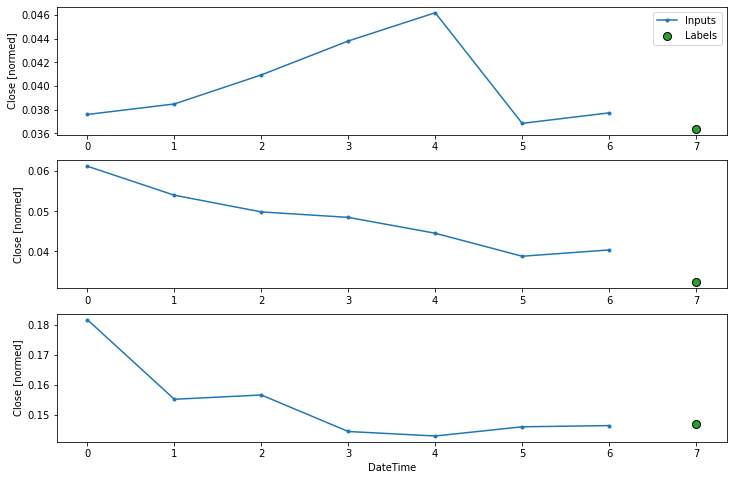

In [186]:
w2.plot()

In [187]:
def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=True,
        batch_size=32,)
    
    ds = ds.map(self.split_window)
    return ds

WindowGenerator.make_dataset = make_dataset

In [188]:
@property
def train(self):
    return self.make_dataset(self.train_df)

@property
def val(self):
    return self.make_dataset(self.val_df)

@property
def test(self):
    return self.make_dataset(self.test_df)

@property
def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
        # No example batch was found, so get one from the `.train` dataset
        result = next(iter(self.train))
        # And cache it for next time
        self._example = result
    return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [189]:
# Each element is an (inputs, label) pair.
w2.train.element_spec

(TensorSpec(shape=(None, 7, 12), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [190]:
for example_inputs, example_labels in w2.train.take(1):
    print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
    print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 7, 12)
Labels shape (batch, time, features): (32, 1, 1)


### Single-Step Models

In [191]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['Close'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['Close']

In [192]:
for example_inputs, example_labels in single_step_window.train.take(1):
    print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
    print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 12)
Labels shape (batch, time, features): (32, 1, 1)


In [193]:
models = {}

### Baseline

In [194]:
class Baseline(tf.keras.Model):
    def __init__(self, label_index=None):
        super().__init__()
        self.label_index = label_index
        
    def call(self, inputs):
        if self.label_index is None:
            return inputs
        result = inputs[:, :, self.label_index]
        return result[:, :, tf.newaxis]

In [195]:
baseline = Baseline(label_index=column_indices['Close'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}

val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

53/53 [==============================] - 0s 2ms/step - loss: 1.6282e-05 - mean_absolute_error: 0.0027


In [196]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['Close'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['Close']

In [197]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 12)
Output shape: (32, 24, 1)


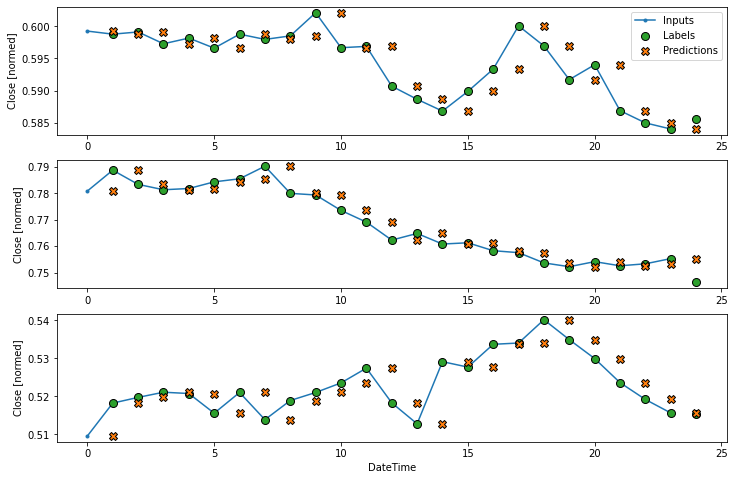

In [198]:
wide_window.plot(baseline)

In [199]:
models['baseline'] = {'data':baseline}

### Linear

In [246]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1) # Linear
])

In [247]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 12)
Output shape: (32, 1, 1)


In [248]:
MAX_EPOCHS = 1000000

def compile_and_fit(model, window, patience=3):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                      patience=patience,
                                                      mode='min')
    model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])
    history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
    return history

In [249]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/1000000
183/183 [==============================] - 1s 6ms/step - loss: 0.2323 - mean_absolute_error: 0.3877 - val_loss: 0.2113 - val_mean_absolute_error: 0.3864
Epoch 2/1000000
183/183 [==============================] - 1s 3ms/step - loss: 0.0813 - mean_absolute_error: 0.2348 - val_loss: 0.0839 - val_mean_absolute_error: 0.2430
Epoch 3/1000000
183/183 [==============================] - 1s 4ms/step - loss: 0.0382 - mean_absolute_error: 0.1575 - val_loss: 0.0397 - val_mean_absolute_error: 0.1745
Epoch 4/1000000
183/183 [==============================] - 1s 4ms/step - loss: 0.0190 - mean_absolute_error: 0.1073 - val_loss: 0.0199 - val_mean_absolute_error: 0.1279
Epoch 5/1000000
183/183 [==============================] - 1s 4ms/step - loss: 0.0104 - mean_absolute_error: 0.0770 - val_loss: 0.0106 - val_mean_absolute_error: 0.0945
Epoch 6/1000000
183/183 [==============================] - 1s 3ms/step - loss: 0.0063 - mean_absolute_error: 0.0594 - val_loss: 0.0058 - val_mean_absolute_

In [250]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 12)
Output shape: (32, 24, 1)


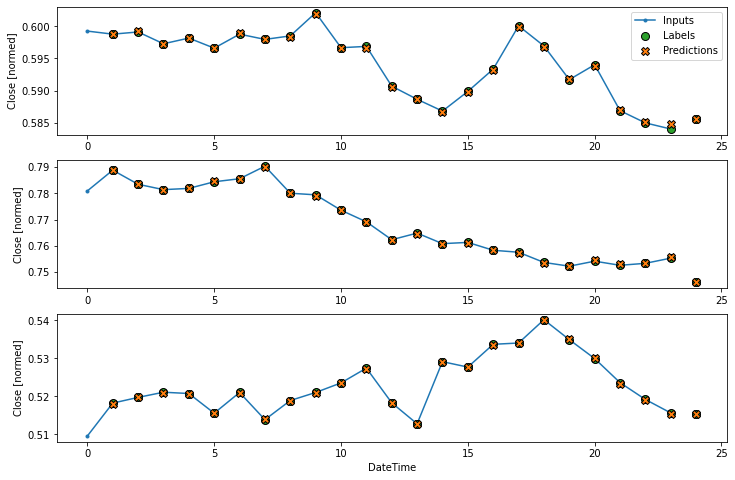

In [251]:
wide_window.plot(linear)

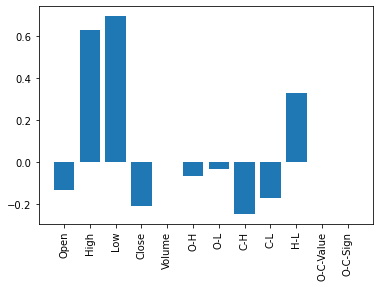

In [252]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

In [253]:
models['linear'] = {'data':linear}

### Dense

In [254]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=3072, activation='relu'),
    tf.keras.layers.Dense(units=1536, activation='relu'),
    tf.keras.layers.Dense(units=768, activation='relu'),
    tf.keras.layers.Dense(units=348, activation='relu'),
    tf.keras.layers.Dense(units=192, activation='relu'),
    tf.keras.layers.Dense(units=96, activation='relu'),
    tf.keras.layers.Dense(units=48, activation='relu'),
    tf.keras.layers.Dense(units=24, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu'),
    tf.keras.layers.Dense(units=6, activation='relu'),
    tf.keras.layers.Dense(units=3, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/1000000
183/183 [==============================] - 3s 11ms/step - loss: 0.0115 - mean_absolute_error: 0.0334 - val_loss: 1.2879e-06 - val_mean_absolute_error: 7.7955e-04
Epoch 2/1000000
183/183 [==============================] - 2s 9ms/step - loss: 4.5765e-06 - mean_absolute_error: 0.0012 - val_loss: 1.0327e-06 - val_mean_absolute_error: 8.0358e-04
Epoch 3/1000000
183/183 [==============================] - 2s 9ms/step - loss: 4.1396e-06 - mean_absolute_error: 0.0012 - val_loss: 8.9516e-07 - val_mean_absolute_error: 7.6173e-04
Epoch 4/1000000
183/183 [==============================] - 2s 8ms/step - loss: 3.0002e-06 - mean_absolute_error: 0.0011 - val_loss: 1.5349e-06 - val_mean_absolute_error: 0.0011
Epoch 5/1000000
183/183 [==============================] - 2s 9ms/step - loss: 2.9568e-06 - mean_absolute_error: 0.0011 - val_loss: 6.1731e-06 - val_mean_absolute_error: 0.0024
Epoch 6/1000000
53/53 [==============================] - 0s 5ms/step - loss: 1.1934e-06 - mean_absolute_er

In [255]:
models['dense'] = {'data':dense}

### Multi-Step Dense

In [256]:
CONV_WIDTH = 7
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['Close'])

conv_window

Total window size: 8
Input indices: [0 1 2 3 4 5 6]
Label indices: [7]
Label column name(s): ['Close']

Text(0.5, 1.0, 'Given 3 hours of inputs, predict 1 hour into the future.')

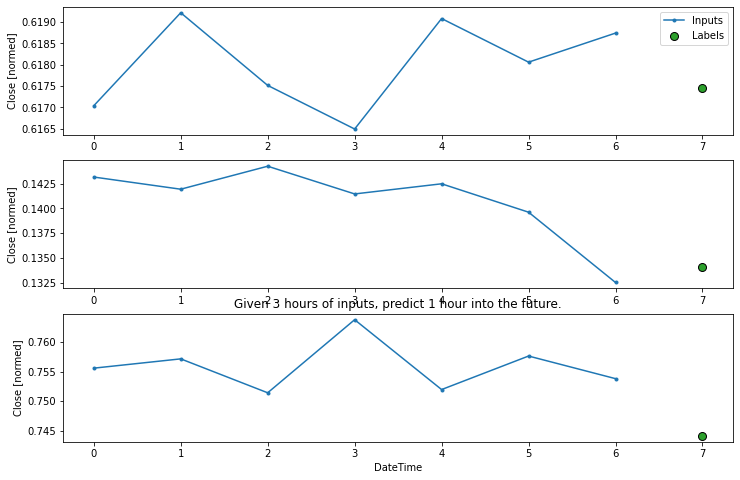

In [257]:
conv_window.plot()
plt.title("Given 3 hours of inputs, predict 1 hour into the future.")

In [258]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=3072, activation='relu'),
    tf.keras.layers.Dense(units=1536, activation='relu'),
    tf.keras.layers.Dense(units=768, activation='relu'),
    tf.keras.layers.Dense(units=348, activation='relu'),
    tf.keras.layers.Dense(units=192, activation='relu'),
    tf.keras.layers.Dense(units=96, activation='relu'),
    tf.keras.layers.Dense(units=48, activation='relu'),
    tf.keras.layers.Dense(units=24, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu'),
    tf.keras.layers.Dense(units=6, activation='relu'),
    tf.keras.layers.Dense(units=3, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [259]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (32, 7, 12)
Output shape: (32, 1, 1)


In [260]:
history = compile_and_fit(multi_step_dense, conv_window)

# IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

Epoch 1/1000000
183/183 [==============================] - 2s 6ms/step - loss: 0.0127 - mean_absolute_error: 0.0437 - val_loss: 3.7243e-05 - val_mean_absolute_error: 0.0056
Epoch 2/1000000
183/183 [==============================] - 1s 5ms/step - loss: 1.1053e-05 - mean_absolute_error: 0.0023 - val_loss: 3.5235e-06 - val_mean_absolute_error: 0.0014
Epoch 3/1000000
183/183 [==============================] - 1s 5ms/step - loss: 5.0261e-06 - mean_absolute_error: 0.0014 - val_loss: 7.6503e-06 - val_mean_absolute_error: 0.0026
Epoch 4/1000000
183/183 [==============================] - 1s 5ms/step - loss: 4.5453e-06 - mean_absolute_error: 0.0013 - val_loss: 5.8830e-06 - val_mean_absolute_error: 0.0022
Epoch 5/1000000
183/183 [==============================] - 1s 5ms/step - loss: 6.9299e-06 - mean_absolute_error: 0.0018 - val_loss: 3.5174e-06 - val_mean_absolute_error: 0.0015
Epoch 6/1000000
183/183 [==============================] - 1s 5ms/step - loss: 9.6600e-06 - mean_absolute_error: 0.0022

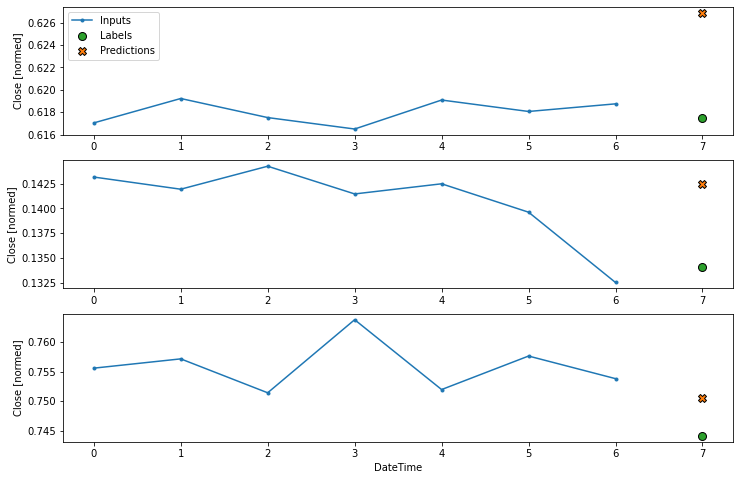

In [261]:
conv_window.plot(multi_step_dense)

In [262]:
print('Input shape:', wide_window.example[0].shape)
try:
    print('Output shape:', multi_step_dense(wide_window.example[0]).shape)
except Exception as e:
    print(f'\n{type(e).__name__}:{e}')

Input shape: (32, 24, 12)

ValueError:Exception encountered when calling layer "sequential_27" (type Sequential).

Input 0 of layer "dense_118" is incompatible with the layer: expected axis -1 of input shape to have value 84, but received input with shape (32, 288)

Call arguments received:
  • inputs=tf.Tensor(shape=(32, 24, 12), dtype=float32)
  • training=None
  • mask=None


In [263]:
models['multi_step_dense'] = {'data':multi_step_dense}

### Convolution Neural Network

In [264]:
# conv_model = tf.keras.Sequential([
#     tf.keras.layers.Conv1D(filters=32,
#                            kernel_size=(CONV_WIDTH,),
#                            activation='relu'),
#     tf.keras.layers.Dense(units=32, activation='relu'),
#     tf.keras.layers.Dense(units=1),
# ])

In [265]:
# print("Conv model on `conv_window`")
# print('Input shape:', conv_window.example[0].shape)
# print('Output shape:', conv_model(conv_window.example[0]).shape)

In [266]:
# history = compile_and_fit(conv_model, conv_window)

# # IPython.display.clear_output()
# val_performance['Conv'] = conv_model.evaluate(conv_window.val)
# performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

In [267]:
# print("Wide window")
# print('Input shape:', wide_window.example[0].shape)
# print('Labels shape:', wide_window.example[1].shape)
# print('Output shape:', conv_model(wide_window.example[0]).shape)

In [268]:
# LABEL_WIDTH = 24
# INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
# wide_conv_window = WindowGenerator(
#     input_width=INPUT_WIDTH,
#     label_width=LABEL_WIDTH,
#     shift=1,
#     label_columns=['Close'])

# wide_conv_window

In [269]:
# print("Wide conv window")
# print('Input shape:', wide_conv_window.example[0].shape)
# print('Labels shape:', wide_conv_window.example[1].shape)
# print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

In [270]:
# wide_conv_window.plot(conv_model)

In [271]:
# models['conv_model'] = {'data':conv_model}

### Recurrent Neural Network

In [272]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(3072, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [273]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 24, 12)
Output shape: (32, 24, 1)


In [274]:
history = compile_and_fit(lstm_model, wide_window)

# IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

Epoch 1/1000000
182/182 [==============================] - 7s 29ms/step - loss: 0.0539 - mean_absolute_error: 0.0887 - val_loss: 0.0090 - val_mean_absolute_error: 0.0404
Epoch 2/1000000
182/182 [==============================] - 5s 25ms/step - loss: 0.0020 - mean_absolute_error: 0.0213 - val_loss: 0.0018 - val_mean_absolute_error: 0.0177
Epoch 3/1000000
182/182 [==============================] - 5s 26ms/step - loss: 4.9922e-04 - mean_absolute_error: 0.0112 - val_loss: 5.5123e-04 - val_mean_absolute_error: 0.0105
Epoch 4/1000000
182/182 [==============================] - 5s 26ms/step - loss: 2.2846e-04 - mean_absolute_error: 0.0071 - val_loss: 2.4390e-04 - val_mean_absolute_error: 0.0075
Epoch 5/1000000
182/182 [==============================] - 5s 26ms/step - loss: 1.3845e-04 - mean_absolute_error: 0.0053 - val_loss: 1.3685e-04 - val_mean_absolute_error: 0.0056
Epoch 6/1000000
182/182 [==============================] - 5s 26ms/step - loss: 9.1613e-05 - mean_absolute_error: 0.0040 - val

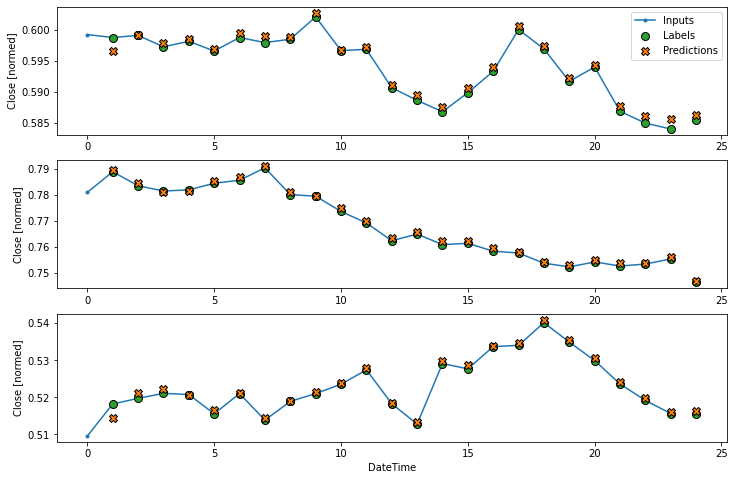

In [275]:
wide_window.plot(lstm_model)

In [276]:
models['lstm_model'] = {'data':lstm_model}

### Performance

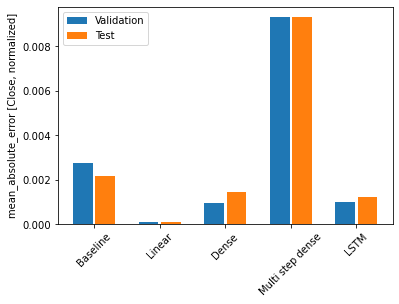

In [277]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [Close, normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [278]:
for name, value in performance.items():
    print(f'{name:12s}: {value[1]:0.4f}')

Baseline    : 0.0022
Linear      : 0.0001
Dense       : 0.0014
Multi step dense: 0.0093
LSTM        : 0.0012


### Save Model and Parameters for UnNormalization

In [288]:
for model in models:
    models[model]['data'].save(f'''../models/{model}''')

In [289]:
import json

unNormalizeParams2 = unNormalizeParams.copy()

unNormalizeParams2['DateTime']['min'] = unNormalizeParams2['DateTime']['min'].strftime("%Y-%m-%d %H:%M:%S")
unNormalizeParams2['DateTime']['max'] = unNormalizeParams2['DateTime']['max'].strftime("%Y-%m-%d %H:%M:%S")

json_object = json.dumps(unNormalizeParams2, indent = 4)

with open('../models/unnormalized_parameters.json', 'w') as outfile:
    outfile.write(json_object)